In [15]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [16]:
google_data = pd.read_csv('Train Data/googleads-performance.csv')
website_data = pd.read_csv('Train Data/website-landings.csv')
google_data.head()

,Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue
0,2024-01-01,Cross-network,143669.0,896.0,656.3,6.5,1410.3
1,2024-01-01,Display Network,3.0,0.0,0.0,0.0,0.0
2,2024-01-01,Search Network,3701.0,251.0,496.5,4.5,576.4
3,2024-01-01,YouTube,36211.0,8.0,115.2,0.0,0.0
4,2024-01-02,Cross-network,183496.0,1172.0,1525.0,8.8,3565.7


In [17]:
website_data.head()

,User Id,Website Landing Time,Is Converted,Source,Channel,Campaign Type
0,20a70111,2024-02-29 01:57:19,0,NaN,direct,NaN
1,20a70111,2024-02-29 13:58:10,0,NaN,direct,NaN
2,58830f30,2024-01-18 13:22:58,0,NaN,direct,NaN
3,58830f30,2024-01-19 16:19:37,0,NaN,direct,NaN
4,58830f30,2024-01-22 13:33:16,0,NaN,direct,NaN


<Axes: xlabel='Cost', ylabel='Revenue'>

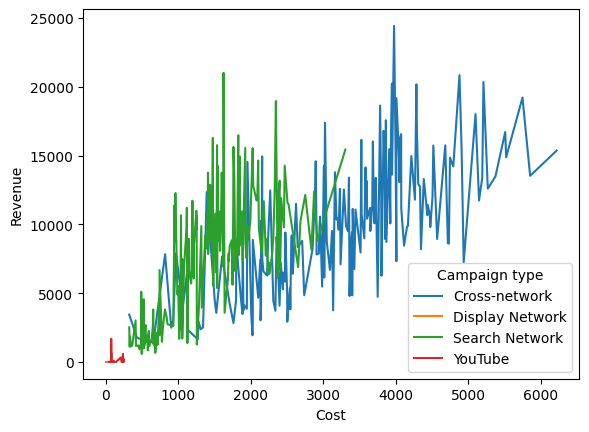

In [18]:
#Visualizing data the line plot of Cost and Revenue
sns.lineplot(x='Cost', y='Revenue', data=google_data, hue='Campaign type')

In [19]:
data = pd.concat([google_data, website_data], axis=1)
data.head()

,Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue,User Id,Website Landing Time,Is Converted,Source,Channel,Campaign Type
0,2024-01-01,Cross-network,143669.0,896.0,656.3,6.5,1410.3,20a70111,2024-02-29 01:57:19,0,NaN,direct,NaN
1,2024-01-01,Display Network,3.0,0.0,0.0,0.0,0.0,20a70111,2024-02-29 13:58:10,0,NaN,direct,NaN
2,2024-01-01,Search Network,3701.0,251.0,496.5,4.5,576.4,58830f30,2024-01-18 13:22:58,0,NaN,direct,NaN
3,2024-01-01,YouTube,36211.0,8.0,115.2,0.0,0.0,58830f30,2024-01-19 16:19:37,0,NaN,direct,NaN
4,2024-01-02,Cross-network,183496.0,1172.0,1525.0,8.8,3565.7,58830f30,2024-01-22 13:33:16,0,NaN,direct,NaN


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586314 entries, 0 to 1586313
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Date                  714 non-null      object 
 1   Campaign type         714 non-null      object 
 2   Impressions           714 non-null      float64
 3   Clicks                714 non-null      object 
 4   Cost                  714 non-null      float64
 5   Conversions           714 non-null      float64
 6   Revenue               714 non-null      float64
 7   User Id               1586314 non-null  object 
 8   Website Landing Time  1586314 non-null  object 
 9   Is Converted          1586314 non-null  int64  
 10  Source                971465 non-null   object 
 11  Channel               1586314 non-null  object 
 12  Campaign Type         640729 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 157.3+ MB


In [21]:
# Data Preprocessing
data['Date'] = pd.to_datetime(data['Date'])
data = data.dropna()

In [22]:
data.head()

,Date,Campaign type,Impressions,Clicks,Cost,Conversions,Revenue,User Id,Website Landing Time,Is Converted,Source,Channel,Campaign Type
116,2024-01-30,Cross-network,650377.0,3319.0,5374.6,75.6,13479.2,bb26323a,2024-01-22 14:52:18,0,bing,paid,Shopping
226,2024-02-27,Cross-network,430497.0,2317.0,3799.8,61.3,11870.4,0cee701f,2024-01-22 05:09:58,0,bing,paid,Shopping
242,2024-03-02,Cross-network,334685.0,2020.0,2174.9,30.7,6577.5,fecf2e0c,2024-01-22 22:30:39,0,bing,paid,Shopping
251,2024-03-04,Search Network,14246.0,713.0,1853.7,30.9,8461.7,d0738575,2024-01-25 19:22:09,0,bing,paid,Search & content
366,2024-04-03,Search Network,7905.0,543.0,1510.3,44.5,10779.8,0dcc561d,2024-02-16 07:04:21,0,bing,paid,Search & content


In [23]:
# Customer Journey Analysis
customer_journey = data.groupby('User Id').apply(lambda x: x.sort_values('Website Landing Time')).reset_index(drop=True)
customer_journey['Touchpoint Sequence'] = customer_journey.groupby('User Id').cumcount() + 1

/var/folders/1k/w2_r0tq95bdg2rjqxprgq2zr0000gn/T/ipykernel_51990/2508380427.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  customer_journey = data.groupby('User Id').apply(lambda x: x.sort_values('Website Landing Time')).reset_index(drop=True)


In [24]:
# Ad Spend Analysis
ad_spend = data.groupby(['Date', 'Channel', 'Campaign Type']).agg({
                            'Impressions': 'sum',
                            'Clicks': 'sum',
                            'Cost': 'sum',
                            'Conversions': 'sum',
                            'Revenue': 'sum' }).reset_index()

# Ensure numeric types
ad_spend['Clicks'] = pd.to_numeric(ad_spend['Clicks'], errors='coerce')
ad_spend['Impressions'] = pd.to_numeric(ad_spend['Impressions'], errors='coerce')
ad_spend['Cost'] = pd.to_numeric(ad_spend['Cost'], errors='coerce')
ad_spend['Revenue'] = pd.to_numeric(ad_spend['Revenue'], errors='coerce')

ad_spend['CPC'] = ad_spend['Cost'] / ad_spend['Clicks']
ad_spend['CPM'] = ad_spend['Cost'] / (ad_spend['Impressions'] / 1000)
ad_spend['ROAS'] = ad_spend['Revenue'] / ad_spend['Cost']

In [25]:

# Machine Learning Analysis
# Clustering customers based on their journey
journey_features = customer_journey[['User Id', 'Touchpoint Sequence', 'Channel', 'Campaign Type', 'Is Converted']]
journey_features = pd.get_dummies(journey_features, columns=['Channel', 'Campaign Type'])
kmeans = KMeans(n_clusters=5, random_state=42)
customer_journey['Cluster'] = kmeans.fit_predict(journey_features.drop('User Id', axis=1))


/Users/vivekchahal/developer/ML/package/lib/python3.9/site-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [29]:

# Regression to identify trends
X = ad_spend[['Impressions', 'Clicks', 'Cost']]
y = ad_spend['Conversions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


# Finding mse
mse = mean_squared_error(y_test, y_pred)
mse

15.31034479709559

In [27]:
# Budget Allocation
# Example: Allocate budget based on ROAS
budget_allocation = ad_spend.groupby('Channel').agg({'ROAS': 'mean'}).reset_index()
budget_allocation['Allocated Budget'] = budget_allocation['ROAS'] / budget_allocation['ROAS'].sum() * 1000000  # Example total budget


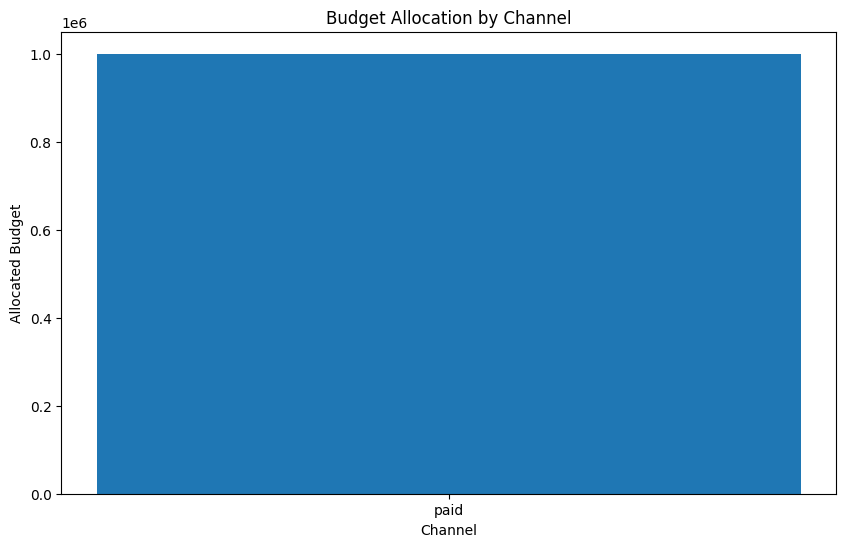

In [28]:

# Plotting results
plt.figure(figsize=(10, 6))
plt.bar(budget_allocation['Channel'], budget_allocation['Allocated Budget'])
plt.xlabel('Channel')
plt.ylabel('Allocated Budget')
plt.title('Budget Allocation by Channel')
plt.show()